# PS2 

Tyler Amos

MACSS 30200

30 April 2018

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [10]:
def three_d_plot(x_list, y_list, z_mat, label_list, dim_list):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure(figsize = (dim_list[2], dim_list[3]))
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(x_list), np.array(y_list))
    Z = z_mat

    # Plot the surface.
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel(label_list[0])
    ax.set_ylabel(label_list[1])
    ax.set_zlabel(label_list[2])
    plt.title(label_list[3])
    ax.view_init(dim_list[0], dim_list[1])
    
def three_d_plot_matrix_inputs(X, Y, Z, label_list, dim_list):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure(figsize = (dim_list[2], dim_list[3]))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel(label_list[0])
    ax.set_ylabel(label_list[1])
    ax.set_zlabel(label_list[2])
    plt.title(label_list[3])
    ax.view_init(dim_list[0], dim_list[1])

# a)

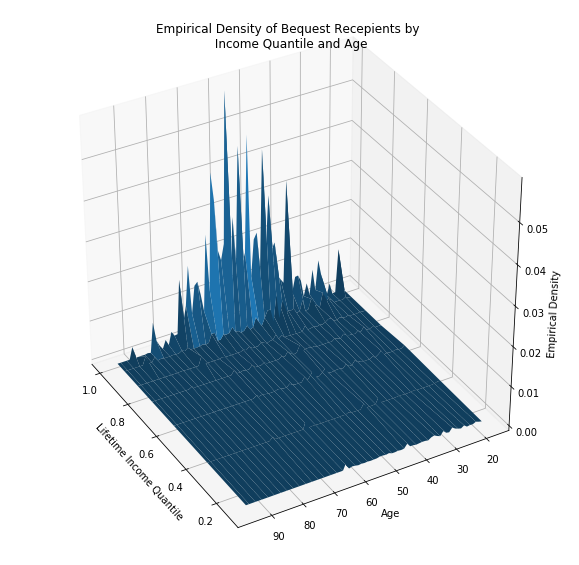

In [3]:
data = np.loadtxt("https://raw.githubusercontent.com/UC-MACSS/persp-research_Spr18/master/assignments/PS2/data/BQmat_orig.txt",
                 delimiter = ',')
income_brackets = [0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01]

# sum up quantiles and drop half of the difference so we get a midpoint
cum_income = [sum(income_brackets[:i+1]) - (income_brackets[i]/2) for i in range(len(income_brackets))]

# scale the data to sum nicely to 1
data_scaled = data / data.sum()

labs = ["Lifetime Income Quantile", "Age", "Empirical Density", "Empirical Density of Bequest Recepients by \n Income Quantile and Age"]
dims = [35, 150, 10, 10]
age_list = list(np.arange(18,96))

three_d_plot(cum_income, age_list, data_scaled, labs, dims)
plt.savefig("incomevsage3dsurface.png")

# b)


In this kernel density esimation, we use the lambda value as 
calculated by Scott's Rule. The calculated value is 0.19



The esimated density for a recipient who is 61 and in quartile 6
 for lifetime income is 0.0022050987746631457


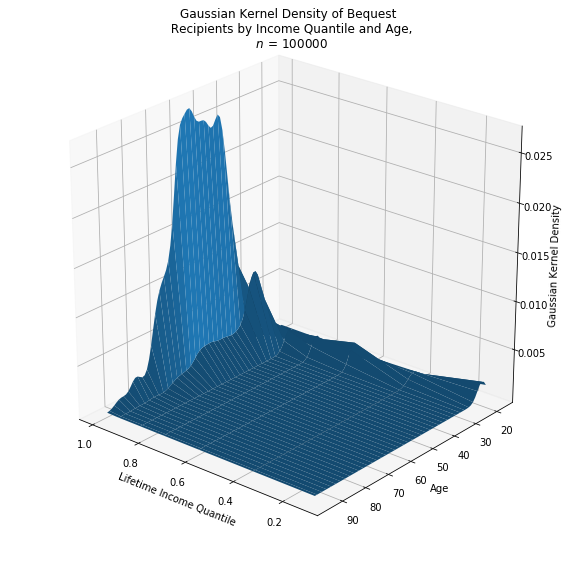

In [38]:
ages_vec = np.array(age_list)
abils_midpt = np.array(cum_income)
prop_mat_inc = np.sum(data_scaled, axis=0)
prop_mat_age = np.sum(data_scaled, axis=1)

np.random.seed(1212)
# take a large sample
lrg_sample = 100000
age_probs = np.random.multinomial(lrg_sample, prop_mat_age)
income_probs = np.random.multinomial(lrg_sample, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
    
# calculate the lambda value using Scott's Rule
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dimension_number = 3

lambda_val = lrg_sample **(-1./(dimension_number+4))

# set up the data and calculate the kernel
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=lambda_val)

# plot
income_matrix, age_matrix = np.meshgrid(abils_midpt, ages_vec)
coords = np.vstack([item.ravel() for item in [age_matrix, income_matrix]])
BQkde = density(coords).reshape(age_matrix.shape)
BQkde_scaled = BQkde / np.sum(BQkde)

labs = ["Lifetime Income Quantile", "Age", "Gaussian Kernel Density",
        "Gaussian Kernel Density of Bequest \n Recipients by Income Quantile and Age,\n $n$ = {}".format(lrg_sample)]
dims = [25, 130, 10, 10]
three_d_plot_matrix_inputs(income_matrix, age_matrix, BQkde_scaled,
                           labs, dims)
print("In this kernel density esimation, we use the lambda value as \ncalculated by Scott's Rule. The calculated value is {}".format(round(lambda_val,2)))

print("\n\n")

print("The estimated density for a recipient who is 61 and in quartile 6\n for lifetime income is {}".format(BQkde_scaled[61 - 17, 5]))


# 2) Interaction Terms

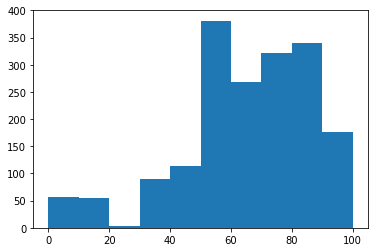

In [36]:
biden_df = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-research_Spr18/master/assignments/PS2/data/biden.csv")
biden_df.dropna(inplace = True)
plt.hist(biden_df.biden);

In [27]:
biden.head()

,biden,female,age,educ,dem,rep
0,90.0,0,19.0,12.0,1.0,0.0
1,70.0,1,51.0,14.0,1.0,0.0
2,60.0,0,27.0,14.0,0.0,0.0
3,50.0,1,43.0,14.0,1.0,0.0
4,60.0,1,38.0,14.0,0.0,1.0
